### Single Sample T-test

In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
final_df = pd.concat([train, test]).sample(1309)

In [3]:
pop = final_df['Age'].dropna()

In [4]:
sample_age = pop.sample(25).values

In [5]:
sample_age

array([ 5., 31., 32., 35., 34., 26.,  9., 28., 27.,  7., 38., 42., 24.,
       24., 55., 55., 22., 34., 16., 47., 26., 25., 39., 24., 63.])

In [6]:
# H0 -> The mean age is 35
# H1 -> The mean age is less than 35

In [7]:
# Check for normality using Shapiro Wilk Test
from scipy.stats import shapiro

shapiro_age = shapiro(sample_age)

print(shapiro_age)

ShapiroResult(statistic=0.9631302952766418, pvalue=0.4802742600440979)


In [8]:
pop_mean = 35

In [12]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_1samp(sample_age, pop_mean)

print('t_statistics:', t_statistic)
print('p-value:', p_value/2) # 1 tail test

t_statistics: -1.4827778447853548
p-value: 0.0755734391514682


In [13]:
alpha = 0.05

if p_value < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


### Independent 2 Sample T-test

In [14]:
from scipy.stats import shapiro

# Input the data as lists
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

# Perform the Shapiro-Wilk test for both desktop and mobile users
shapiro_desktop = shapiro(desktop_users)
shapiro_mobile = shapiro(mobile_users)

print('Shapiro-Wilk test for desktop users:', shapiro_desktop)
print('Shapiro-Wilk test for mobile users:', shapiro_mobile)

Shapiro-Wilk test for desktop users: ShapiroResult(statistic=0.9783114194869995, pvalue=0.7790969014167786)
Shapiro-Wilk test for mobile users: ShapiroResult(statistic=0.9714356064796448, pvalue=0.5791608691215515)


In [15]:
from scipy.stats import levene

desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

# Perform Levene's test
levene_test = levene(desktop_users, mobile_users)
print(levene_test)

LeveneResult(statistic=2.94395488191752, pvalue=0.09153720526741756)


In [17]:
import numpy as np
import pandas as pd
train = pd.read_csv('train.csv').drop(columns = ['Survived'])
test = pd.read_csv('test.csv')

In [18]:
final_df = pd.concat([train, test]).sample(1309)

In [19]:
pop_male = final_df[final_df['Sex'] == 'male']['Age'].dropna()
pop_female = final_df[final_df['Sex'] == 'female']['Age'].dropna()

In [20]:
sample_male = pop_male.sample(25)
sample_female = pop_female.sample(25)

alpha = 0.05

In [21]:
# H0 -> Mean age of male and female are same
# H1 -> Mean age of male is higher than female

In [22]:
from scipy.stats import shapiro

shapiro_male = shapiro(sample_male)
shapiro_female = shapiro(sample_female)

print('Shapiro-Wilk test for male:', shapiro_male)
print('Shapiro-Wilk test for female:', shapiro_female)

Shapiro-Wilk test for male: ShapiroResult(statistic=0.9519215822219849, pvalue=0.2768935561180115)
Shapiro-Wilk test for female: ShapiroResult(statistic=0.9431780576705933, pvalue=0.17523841559886932)


In [23]:
from scipy.stats import levene

# Perform Levene's test
levene_test = levene(sample_male, sample_female)
print(levene_test)

LeveneResult(statistic=0.07431257966791925, pvalue=0.7863274793715005)


In [25]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_ind(sample_male, sample_female)

print('t_statistics:', t_statistic)
print('p-value:', p_value/2) # 1 tail test

t_statistics: 1.0666353606894694
p-value: 0.14573610187206368


### Paired 2 Sample T-test

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

before=np.array([80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91])
after=np.array([78, 93, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88])

In [29]:
differences = after - before

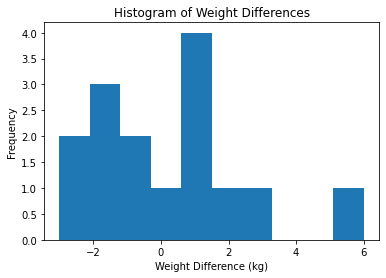

Shapiro-Wilk test: ShapiroResult(statistic=0.9220570921897888, pvalue=0.20704729855060577)


In [30]:
plt.hist(differences)
plt.title('Histogram of Weight Differences')
plt.xlabel('Weight Difference (kg)')
plt.ylabel('Frequency')
plt.show()

shapiro_test = stats.shapiro(differences)
print('Shapiro-Wilk test:', shapiro_test)

In [31]:
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof = 1)

In [32]:
n = len(differences)
t_statistics = mean_diff/(std_diff/np.sqrt(n))
df = n-1

In [33]:
t_statistic

1.0666353606894694

In [36]:
alpha = 0.05
p_value = stats.t.cdf(t_statistic, df)

In [35]:
p_value

0.1520929058814824

In [37]:
# Null Hypothesis failed to reject